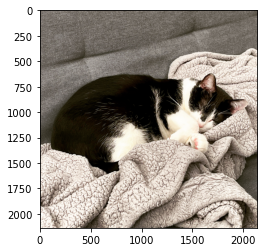

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.vq import whiten
import matplotlib.image as img
import matplotlib.pyplot as py
from scipy.cluster.vq import kmeans, vq
from pprint import pprint
from sklearn.cluster import KMeans
image = img.imread('/cat2.JPG')
py.imshow(image)

In [25]:
r = []
g = []
b = []

coord_mat = {
    'x' : [],
    'y' : [],
    'rgb' : []
}



y_counter = 0
for row in image:
    x_counter = 0
    for pixel in row:
        coord_mat['x'].append(x_counter)
        coord_mat['y'].append(y_counter)
        coord_mat['rgb'].append(pixel)
        # A pixel contains RGB values
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
        x_counter += 1
    y_counter += 1
    if y_counter %10000 == 0:
        print('rows finished {}'.format(y_counter))
print(r[0:5])
coord_mat_df = pd.DataFrame(coord_mat)

[117, 135, 150, 148, 167]


In [5]:
pixels = pd.DataFrame({'red': r,
                       'blue': b,
                       'green': g})

print(pixels.head())
pixels['scaled_red'] = whiten(pixels['red'])
pixels['scaled_green'] = whiten(pixels['green'])
pixels['scaled_blue'] = whiten(pixels['blue'])
print(pixels.head())

   red  blue  green
0  117   106    109
1  135   124    127
2  150   139    142
3  148   135    141
4  167   154    160
   red  blue  green  scaled_red  scaled_green  scaled_blue
0  117   106    109    1.468734      1.398686     1.374490
1  135   124    127    1.694693      1.629662     1.607894
2  150   139    142    1.882992      1.822142     1.802398
3  148   135    141    1.857886      1.809310     1.750530
4  167   154    160    2.096398      2.053117     1.996901


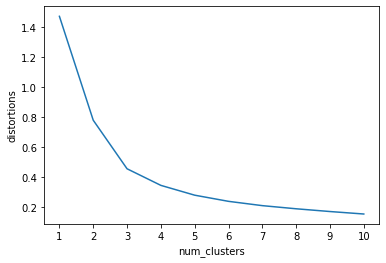

In [11]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

distortions = []
num_clusters = range(1, 11)
# Create a list of distortions from the kmeans method
for i in num_clusters:
    cluster_centers, distortion = kmeans(pixels[['scaled_red', 'scaled_blue',
                                        'scaled_green']], i)
    distortions.append(distortion)
    
# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters,
                           'distortions': distortions})
# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [49]:
 cluster_centers, _ = kmeans(pixels[['scaled_red', 'scaled_blue',
                                    'scaled_green']],3)

In [50]:
colors = []
# Find Standard Deviations
r_std, g_std, b_std = pixels[['red', 'blue', 'green']].std()
# Scale actual RGB values in range of 0-1
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
        scaled_r * r_std/255,
        scaled_g * g_std/255,
        scaled_b * b_std/255
))
 

In [51]:
 #Dimensions:
print(colors)

[(0.103349059975997, 0.044224173764472345, 0.08196307873107911), (0.8965406257167996, 0.809002620076662, 0.8540133634542256), (0.4819467831125644, 0.4068891698640198, 0.4423679787769761)]


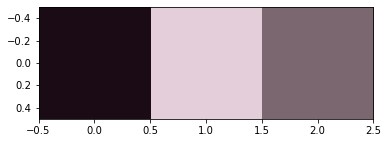

In [52]:
#Dimensions:
from matplotlib import pyplot as plt
plt.imshow([colors])
plt.show()

In [53]:
pixels.head()

,red,blue,green,scaled_red,scaled_green,scaled_blue
0,117,106,109,1.468734,1.398686,1.374490
1,135,124,127,1.694693,1.629662,1.607894
2,150,139,142,1.882992,1.822142,1.802398
3,148,135,141,1.857886,1.809310,1.750530
4,167,154,160,2.096398,2.053117,1.996901


In [54]:
idx, _ = vq(pixels[['scaled_red', 'scaled_blue','scaled_green']].values, cluster_centers)

In [55]:
coord_mat_df['clusters'] = idx
coord_mat_df_pivot = coord_mat_df.pivot(index='x', columns = 'y', values = 'clusters')

<ipython-input-56-1ac3555600e0>:3: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  pixel_plot.add_axes()


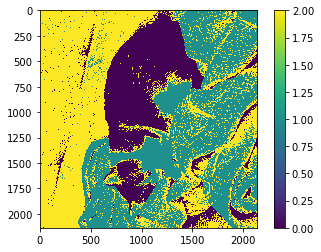

In [56]:
import matplotlib.pyplot as plt
pixel_plot = plt.figure()
pixel_plot.add_axes()
pixel_plot = plt.imshow(coord_mat_df_pivot, interpolation='nearest')
plt.colorbar(pixel_plot)
plt.show(pixel_plot)